# Problem 2, Programming (20 pts): 
### In the first code cell, use ChatGPT to generate code for a Convolutional Neural Network (CNN) variant “LeNet” (Yann LeCun’s original model), and train it on the MNIST hand-written data set. Use 2 conv layers. Make the receptive field size to be 5 × 5. Use 25 channels for each conv layer (i.e., you will have 25 kernels). Experiment with different learning parameters, such as the number of epochs, etc. You should get a pretty good outcome (above 99% accuracy).

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the LeNet-inspired CNN
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # First convolutional layer: in_channels=1 (grayscale), out_channels=25, kernel_size=5
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=25, kernel_size=5)
        # Second convolutional layer: in_channels=25, out_channels=25, kernel_size=5
        self.conv2 = nn.Conv2d(in_channels=25, out_channels=25, kernel_size=5)
        # Fully connected layers
        self.fc1 = nn.Linear(25 * 4 * 4, 120)  # Adjust dimensions based on input size and kernel
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes (digits 0-9)

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Apply ReLU after the first convolution
        x = F.max_pool2d(x, 2)  # Apply max pooling with kernel size 2
        x = F.relu(self.conv2(x))  # Apply ReLU after the second convolution
        x = F.max_pool2d(x, 2)  # Apply max pooling with kernel size 2
        x = x.view(-1, 25 * 4 * 4)  # Flatten the tensor for the fully connected layers
        x = F.relu(self.fc1(x))  # Apply ReLU after the first fully connected layer
        x = F.relu(self.fc2(x))  # Apply ReLU after the second fully connected layer
        x = self.fc3(x)  # Output layer (logits)
        return x

# MNIST dataset and data loaders
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize dataset
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize model, loss function, and optimizer
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate the model on the test dataset
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# https://chatgpt.com/share/674a49ef-0fa0-8002-b9ca-f8a3deea57cc

Epoch 1/10, Loss: 0.1284
Epoch 2/10, Loss: 0.0394
Epoch 3/10, Loss: 0.0875
Epoch 4/10, Loss: 0.0405
Epoch 5/10, Loss: 0.0028
Epoch 6/10, Loss: 0.0024
Epoch 7/10, Loss: 0.0001
Epoch 8/10, Loss: 0.0002
Epoch 9/10, Loss: 0.0010
Epoch 10/10, Loss: 0.0355
Test Accuracy: 99.13%


# Problem 3, Written (20 pts):
### In the CNN code generated, you will see a section like [in the hw document]. Explain what each layer does, in your own words. Do not use ChatGPT for this. Include this as a comment in the code. Note: this code is in tensorflow. If your code is generated for Pytorch or some other framework, you will get something similar.

ChatGPT decided not to put the layers in Sequential(), and instead call them each again in forward.
```
# init creates the archetecture of the NN by specifying its layers and their inputs/outputs
def __init__(self):
    # out init will inherit from LeNet, as per the homework document
    super(LeNet, self).__init__()
    # First convolutional layer: in_channels=1 (grayscale), out_channels=25, kernel_size=5
    # Begin with a convolutional layer with 1 input channel since each pixel contains 1 value for its color on the grayscale, outputs 25 channels, and a 5x5 kernel size
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=25, kernel_size=5)
    # Second convolutional layer: in_channels=25, out_channels=25, kernel_size=5
    # The next convolutional layer has 25 input channels for the 25 previous outputs, 25 output channels, and a 5x5 kernel size
    self.conv2 = nn.Conv2d(in_channels=25, out_channels=25, kernel_size=5)
    # Fully connected layers
    # Next, we have a linear block with 3 fully connected layers
    # First layer inputs 25*4*4 which is the size of the output from the second convolutional layer after being max pooled and flattened
    self.fc1 = nn.Linear(25 * 4 * 4, 120)  # Adjust dimensions based on input size and kernel
    # Second layer inputs the 120 from the previous and outputs a reduced 84 features
    self.fc2 = nn.Linear(120, 84)
    # Last linear layer reduces down to 
    self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes (digits 0-9)

# since the layers are not in Sequential(), forward propagates the data through each layer "manually"
def forward(self, x):
    # ReLU is an activation function that silences negative values and activates linearly on positive values
    # max pooling is an additional filter over the results of a conv layer that consolidates the tensor around its higher activations
    # first pass the data through the first convolutional layer with ReLU activation
    x = F.relu(self.conv1(x))  # Apply ReLU after the first convolution
    # max pool the output
    x = F.max_pool2d(x, 2)  # Apply max pooling with kernel size 2
    # next pass through the second convolutional layer and apply ReLU
    x = F.relu(self.conv2(x))  # Apply ReLU after the second convolution
    # max pool
    x = F.max_pool2d(x, 2)  # Apply max pooling with kernel size 2
    # I suspect this is why GPT decided not to use Sequential, because we then reshape our data to prepare it for the linear block
    # Though I am certain this can still be done in Sequential, so perhaps thats just how it likes to use pytorch
    x = x.view(-1, 25 * 4 * 4)  # Flatten the tensor for the fully connected layers
    # finally we pass the data through the 3 linear fully-connected layers, again using ReLU activation
    x = F.relu(self.fc1(x))  # Apply ReLU after the first fully connected layer
    x = F.relu(self.fc2(x))  # Apply ReLU after the second fully connected layer
    x = self.fc3(x)  # Output layer (logits)
    return x
```

# Problem 4, Programming (20 pts):
### In the second code cell, use ChatGPT to plot the convolution kernels from the first conv layer. Use the “gray” colormap. See below for an example. Here, there were 25 channels, which were plotted in a 5 × 5 arrangement. See the hw doc for an example (section 3).

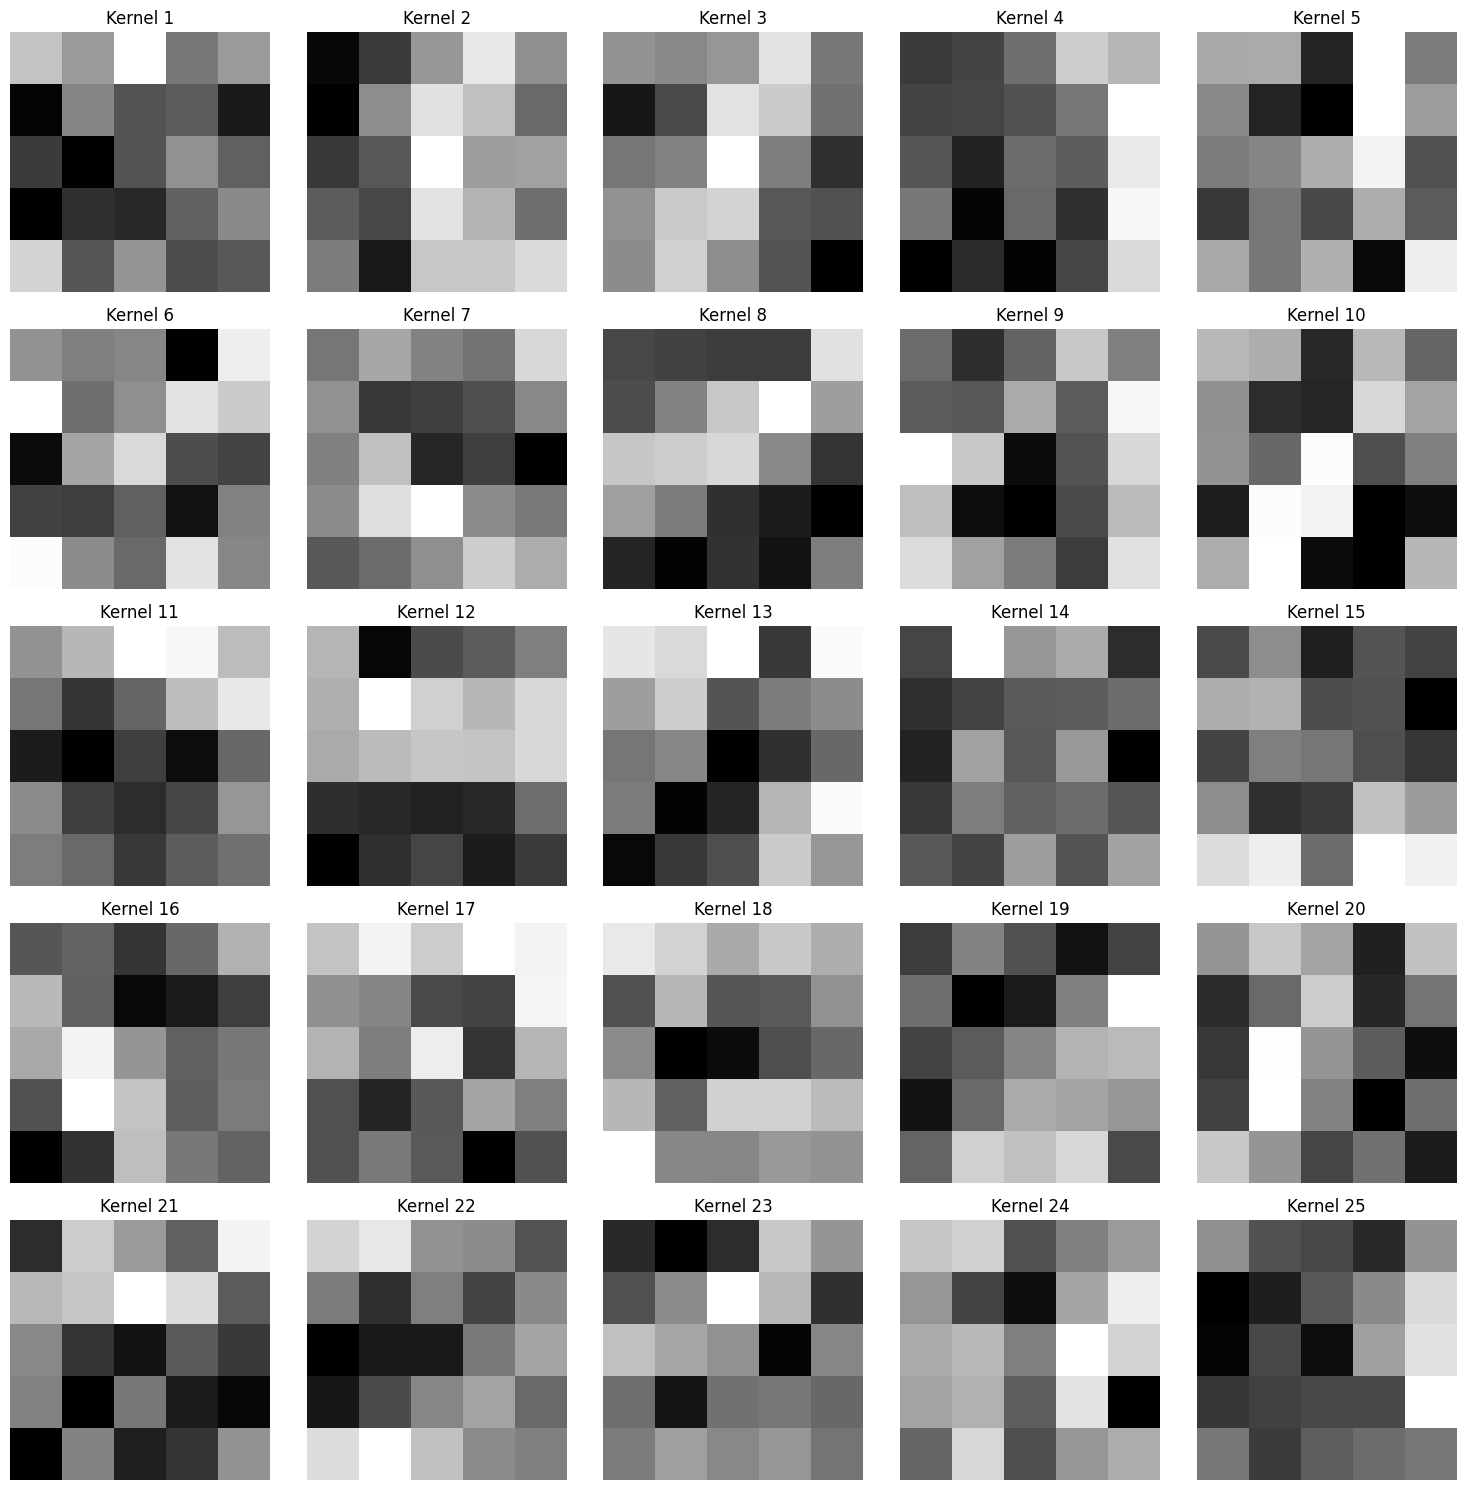

In [10]:
import matplotlib.pyplot as plt

# Function to visualize convolutional kernels
def visualize_kernels(layer, num_cols=5):
    kernels = layer.weight.data  # Get the kernel weights
    num_kernels = kernels.size(0)  # Number of kernels
    kernels = kernels.squeeze()  # Remove singleton dimensions (1x5x5 -> 5x5)
    
    num_rows = (num_kernels + num_cols - 1) // num_cols  # Rows to accommodate all kernels
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()  # Flatten axes for easy indexing
    
    for i in range(len(axes)):
        if i < num_kernels:
            kernel = kernels[i].cpu().numpy()  # Convert tensor to NumPy array
            axes[i].imshow(kernel, cmap='gray')  # Plot with colormap
            axes[i].set_title(f'Kernel {i+1}')
            axes[i].axis('off')
        else:
            axes[i].axis('off')  # Turn off unused subplots
    
    plt.tight_layout()
    plt.show()

# Visualize kernels from the first convolutional layer
visualize_kernels(model.conv1)

# https://chatgpt.com/share/674a49ef-0fa0-8002-b9ca-f8a3deea57cc

# Problem 5, Programming (20 pts):
### (4) In the third code cell, use ChatGPT to plot the featuremaps from first conv layer. Pick an input in the category “3” and show the plot. Use the “gray” colormap. See hw file for an example.

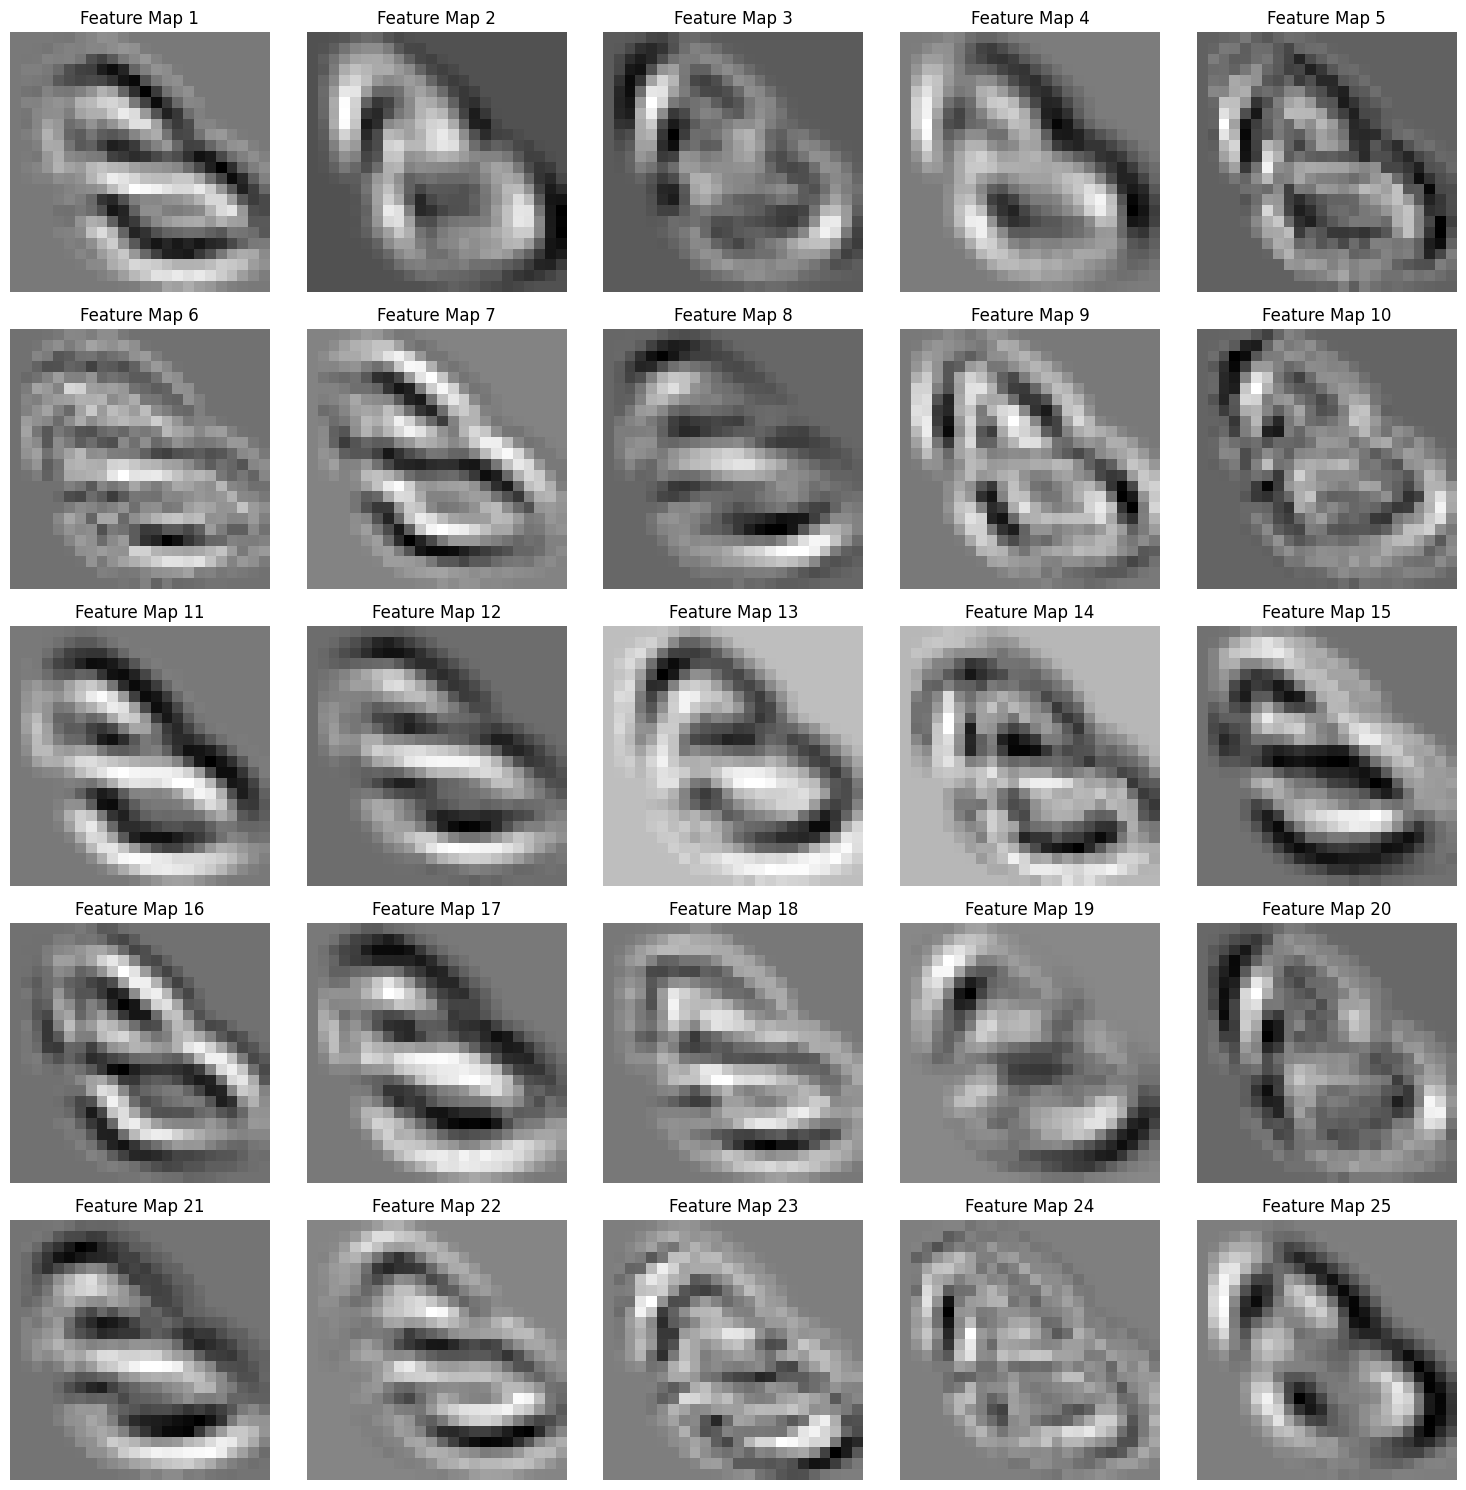

In [19]:
# Function to visualize feature maps of the first convolutional layer
def plot_feature_maps(model, input_image, layer_name='conv1', cmap='gray'):
    """
    Visualize the feature maps of a specified layer.

    Args:
        model (nn.Module): The PyTorch model.
        input_image (torch.Tensor): A single image tensor of shape (1, 1, 28, 28).
        layer_name (str): The name of the layer to visualize (default is 'conv1').
        cmap (str): The colormap for visualization (default is 'gray').
    """
    # Extract the layer from the model
    layer = getattr(model, layer_name)

    # Forward pass through the specific layer
    with torch.no_grad():
        feature_maps = layer(input_image)  # Get feature maps
    feature_maps = feature_maps.squeeze(0)  # Remove batch dimension

    # Plot the feature maps
    num_feature_maps = feature_maps.size(0)  # Number of channels
    num_cols = 5  # Number of columns for the plot
    num_rows = (num_feature_maps + num_cols - 1) // num_cols  # Rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    for i in range(len(axes)):
        if i < num_feature_maps:
            fmap = feature_maps[i].cpu().numpy()  # Convert to NumPy array
            axes[i].imshow(fmap, cmap=cmap)  # Plot each feature map
            axes[i].set_title(f"Feature Map {i+1}")
            axes[i].axis('off')
        else:
            axes[i].axis('off')  # Hide unused axes

    plt.tight_layout()
    plt.show()

# Prepare a single input image
# sample_image, _ = test_dataset[0]  # Get the first image and label
for _, image in enumerate(test_dataset):
    sample_image, label = image
    if label==3:
        input_image = sample_image.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)
        break

# Plot the feature maps of the first convolutional layer
plot_feature_maps(model, input_image, layer_name='conv1')

# https://chatgpt.com/share/674a49ef-0fa0-8002-b9ca-f8a3deea57cc